In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import distclassipy as dcpy

os.chdir("../")
from pathlib import Path
import matplotlib.gridspec as gridspec
import sys

sys.path.append("scripts")
import utils

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
seed_val = settings_dict["seed_choice"]
np.random.seed(seed_val)
sns_dict = settings_dict["sns_dict"]
sns.set_theme(**sns_dict)

In [3]:
# custom_hues = ["#3B4CC0", "#1FA187", "#FBAE17", "#D21F26"]
ibm_palette_hues = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"]
# https://davidmathlogic.com/colorblind/
sns.set_palette(ibm_palette_hues)

In [4]:
# all_metrics = settings_dict["all_metrics"]

unique_metrics = ['euclidean',
 'braycurtis',
 'canberra',
 'cityblock',
 'chebyshev',
 'clark',
 'correlation',
 'cosine',
 'hellinger',
 'jaccard',
 'lorentzian',
 'marylandbridge',
 'meehl',
 'soergel',
 'wave_hedges',
 'kulczynski',
 'add_chisq',
 'acc',
 'chebyshev_min',
 'dice',
 'divergence',
 'google',
 'jeffreys',
 'kumarjohnson',
 'penroseshape',
 'squared_chisq',
 'squaredchord',
 'squared_euclidean',
 'taneja',
 'topsoe',
 'vicis_symmetric_chisq',
 'vicis_wave_hedges']

In [5]:
features = pd.read_parquet("data/reduced_balancedfeatures_LATEST.parquet")
features["class"].value_counts()

class
CEP     683
DSCT    683
EB      683
RRL     683
Name: count, dtype: int64

In [6]:
features = features.sample(frac=1)

In [7]:
final_features = ['SPM_A_Y',
 'Multiband_period',
 'r-i',
 'Harmonics_phase_4_i',
 'Harmonics_phase_2_r',
 'Power_rate_4']

In [8]:
X_df = features.loc[:,final_features]
y_df = features["class"]

In [9]:
X = X_df.to_numpy()
y = y_df.to_numpy()

### 1. Random Forest Check

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Make sure we're not over fitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=settings_dict["seed_choice"]
)

rfc = RandomForestClassifier(
    random_state=settings_dict["seed_choice"], max_depth=3, n_jobs=-1
)
# Important to make sure it's not overfitting.
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9715846994535519
0.9711751662971175


In [12]:
y_pred = cross_val_predict(rfc, X, y, cv=5, n_jobs=-1)

F1 = 97.06 %
Accuracy = 97.07 %
Matthew's Coefficient = 96.10 %


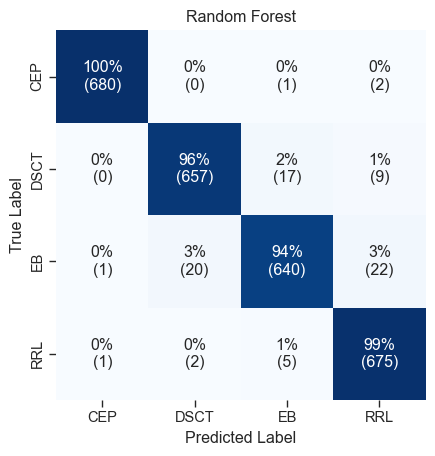

In [13]:
acc = accuracy_score(y, y_pred)
f1score = f1_score(y, y_pred, average="macro")
matthew_coef = matthews_corrcoef(y, y_pred)
print(
    f"F1 = {f1score*100:.2f} %\nAccuracy = {acc*100:.2f} %\nMatthew's Coefficient = {matthew_coef*100:.2f} %"
)

ax = utils.plot_cm(y_true=y, y_pred=y_pred)

plt.title("Random Forest")
plt.show()

### 2. DistClassiPy - all metrics

In [14]:
dcpy_results = []

******************** Euclidean ********************
F1 = 90.13 %
Accuracy = 90.08 %
Matthew's Coefficient = 87.21 %


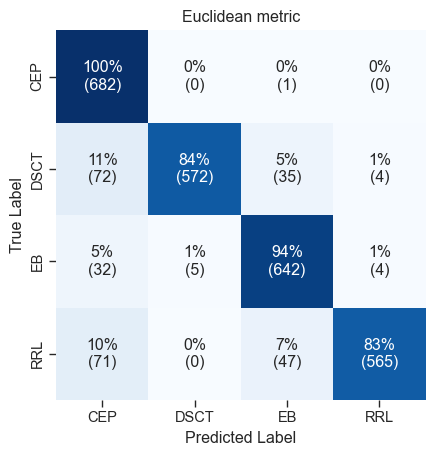

******************** Braycurtis ********************
F1 = 91.55 %
Accuracy = 91.40 %
Matthew's Coefficient = 88.96 %


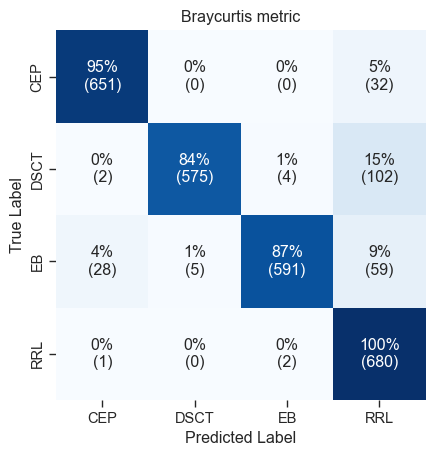

******************** Canberra ********************
F1 = 90.55 %
Accuracy = 90.67 %
Matthew's Coefficient = 87.65 %


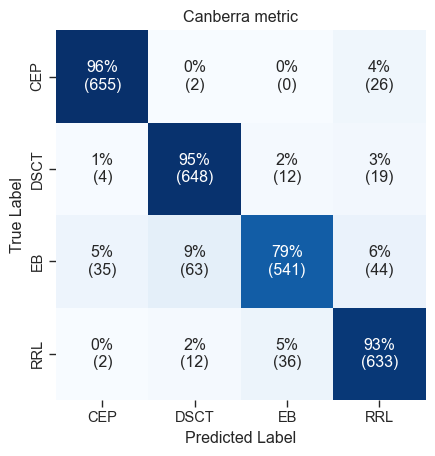

******************** Cityblock ********************
F1 = 89.47 %
Accuracy = 89.49 %
Matthew's Coefficient = 86.48 %


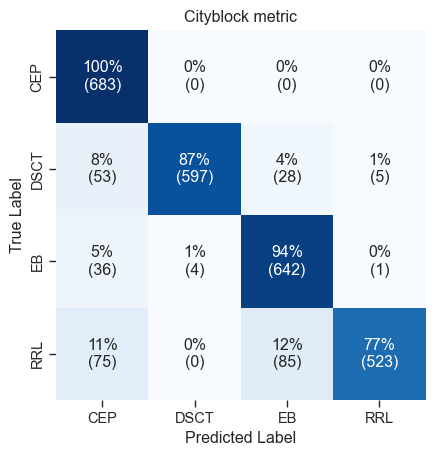

******************** Chebyshev ********************
F1 = 87.25 %
Accuracy = 87.26 %
Matthew's Coefficient = 83.69 %


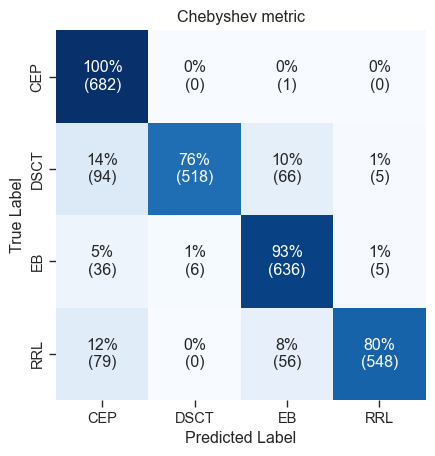

******************** Clark ********************
F1 = 89.26 %
Accuracy = 89.39 %
Matthew's Coefficient = 85.90 %


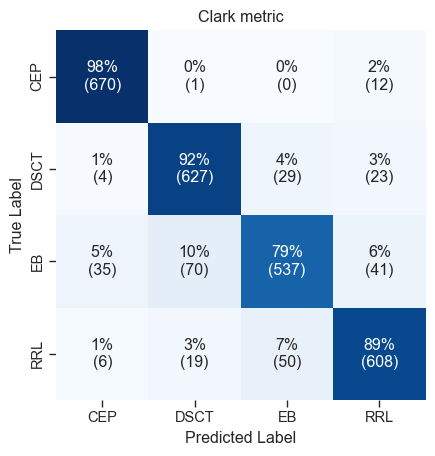

******************** Correlation ********************
F1 = 80.64 %
Accuracy = 80.75 %
Matthew's Coefficient = 76.19 %


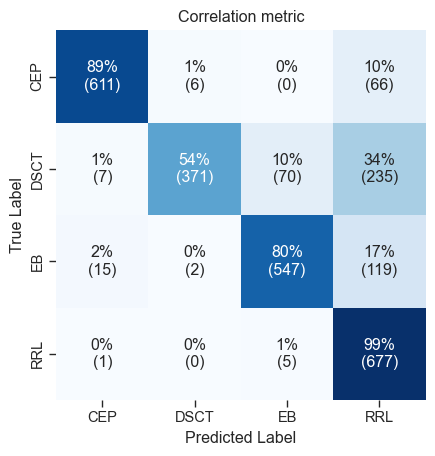

******************** Cosine ********************
F1 = 85.53 %
Accuracy = 85.61 %
Matthew's Coefficient = 81.85 %


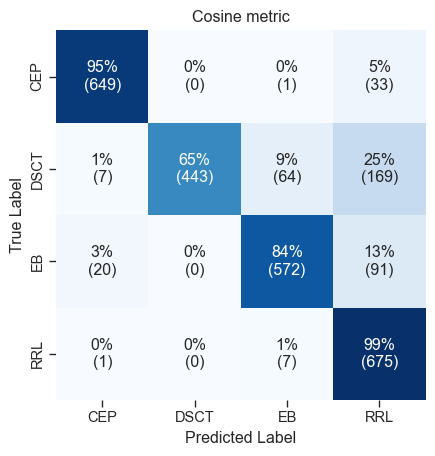

******************** Hellinger ********************
F1 = 91.93 %
Accuracy = 91.91 %
Matthew's Coefficient = 89.39 %


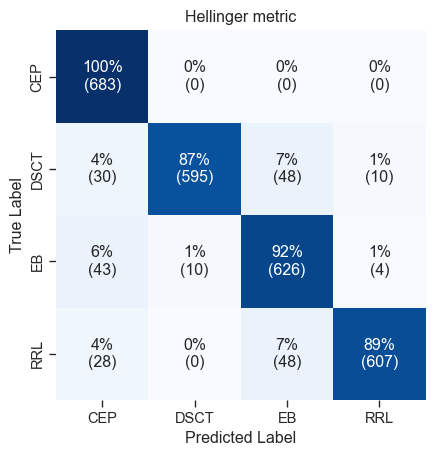

******************** Jaccard ********************
F1 = 87.13 %
Accuracy = 87.01 %
Matthew's Coefficient = 83.67 %


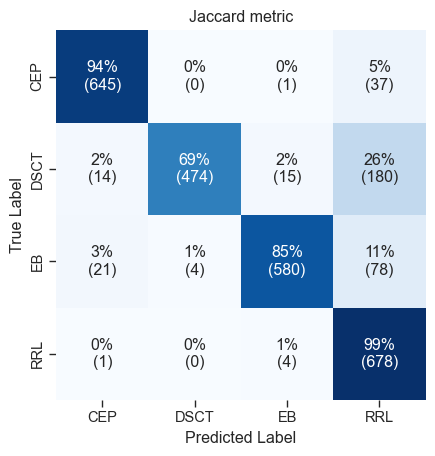

******************** Lorentzian ********************
F1 = 89.12 %
Accuracy = 89.31 %
Matthew's Coefficient = 86.31 %


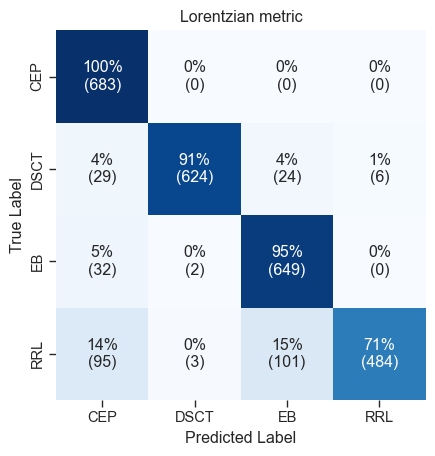

******************** Marylandbridge ********************
F1 = 30.06 %
Accuracy = 34.88 %
Matthew's Coefficient = 13.72 %


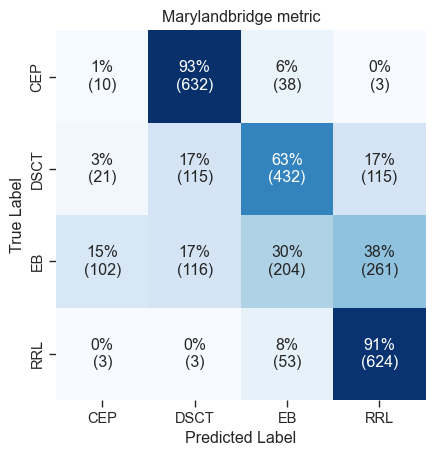

******************** Meehl ********************
F1 = 90.08 %
Accuracy = 90.12 %
Matthew's Coefficient = 87.19 %


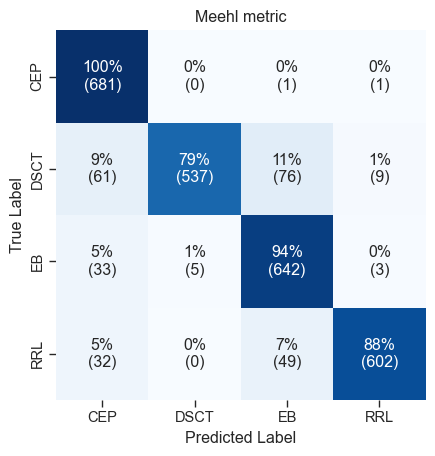

******************** Soergel ********************
F1 = 91.55 %
Accuracy = 91.40 %
Matthew's Coefficient = 88.96 %


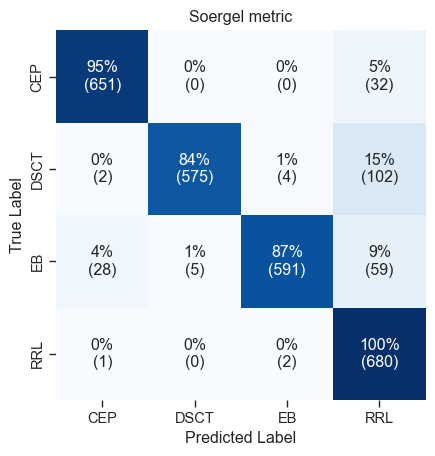

******************** Wave_Hedges ********************
F1 = 90.42 %
Accuracy = 90.52 %
Matthew's Coefficient = 87.55 %


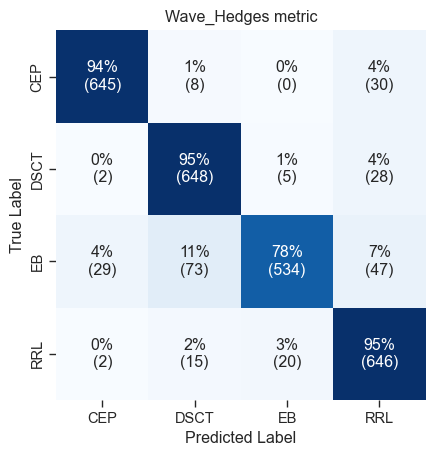

******************** Kulczynski ********************
F1 = 91.55 %
Accuracy = 91.40 %
Matthew's Coefficient = 88.96 %


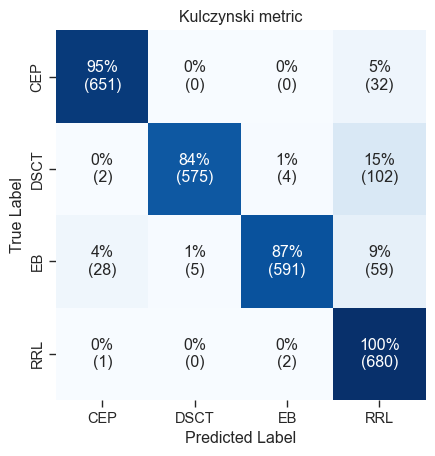

******************** Add_Chisq ********************
F1 = 91.40 %
Accuracy = 91.43 %
Matthew's Coefficient = 88.69 %


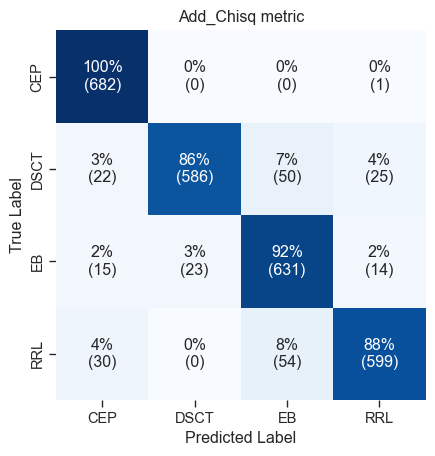

******************** Acc ********************
F1 = 89.88 %
Accuracy = 89.86 %
Matthew's Coefficient = 86.93 %


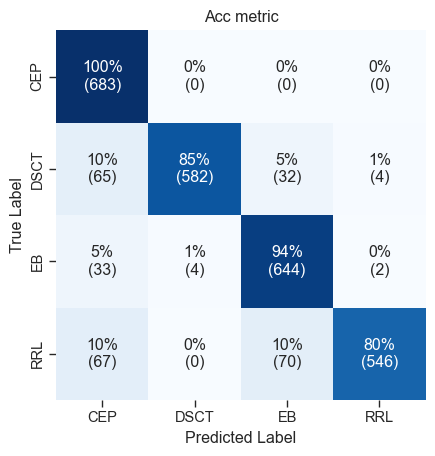

******************** Chebyshev_Min ********************
F1 = 56.13 %
Accuracy = 57.32 %
Matthew's Coefficient = 43.75 %


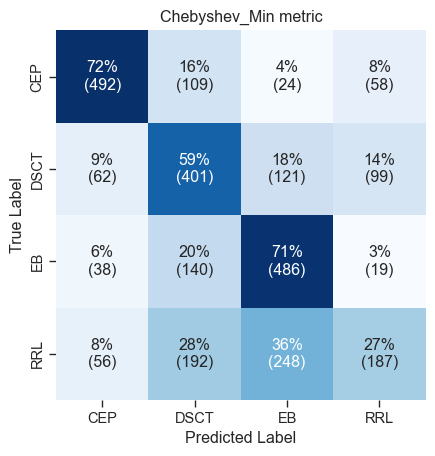

******************** Dice ********************
F1 = 10.15 %
Accuracy = 25.04 %
Matthew's Coefficient = 0.30 %


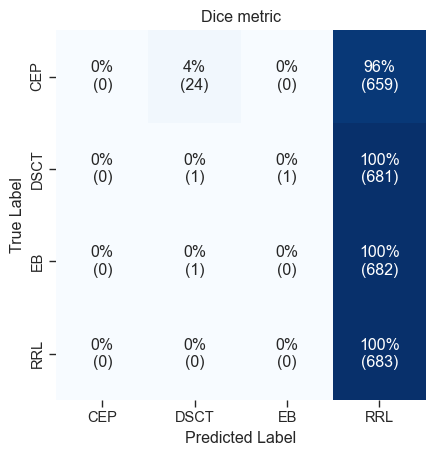

******************** Divergence ********************
F1 = 89.26 %
Accuracy = 89.39 %
Matthew's Coefficient = 85.90 %


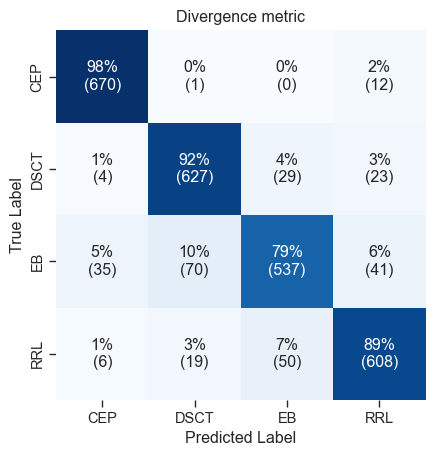

******************** Google ********************
F1 = 88.88 %
Accuracy = 88.76 %
Matthew's Coefficient = 85.71 %


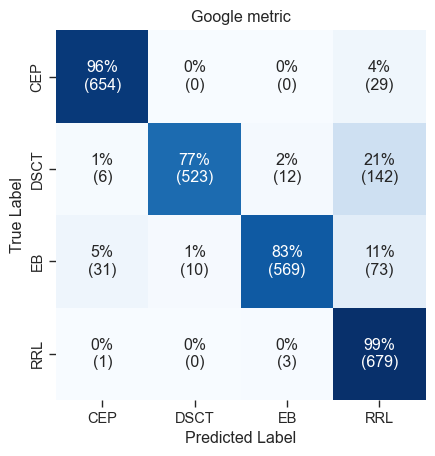

******************** Jeffreys ********************
F1 = 92.04 %
Accuracy = 92.02 %
Matthew's Coefficient = 89.52 %


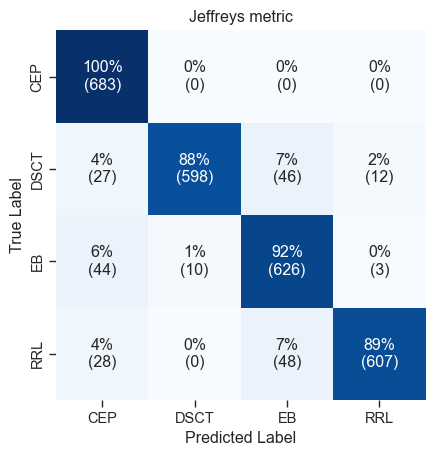

******************** Kumarjohnson ********************
F1 = 89.82 %
Accuracy = 89.90 %
Matthew's Coefficient = 86.62 %


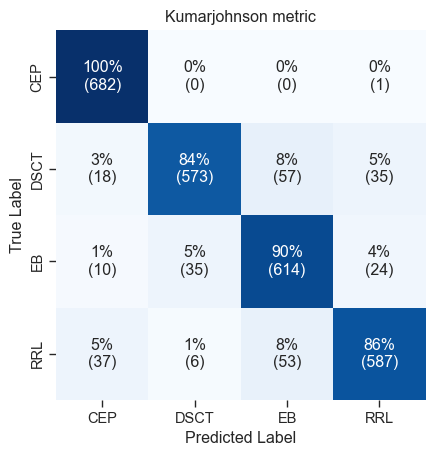

******************** Penroseshape ********************
F1 = 91.59 %
Accuracy = 91.58 %
Matthew's Coefficient = 89.05 %


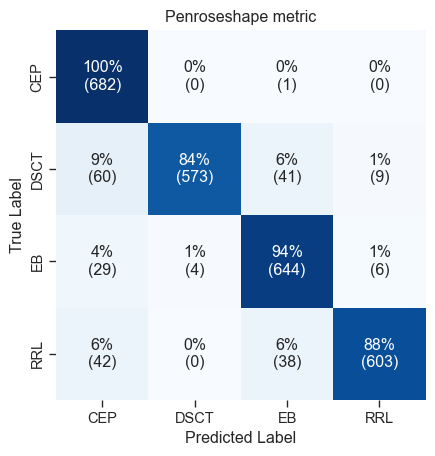

******************** Squared_Chisq ********************
F1 = 92.01 %
Accuracy = 91.98 %
Matthew's Coefficient = 89.50 %


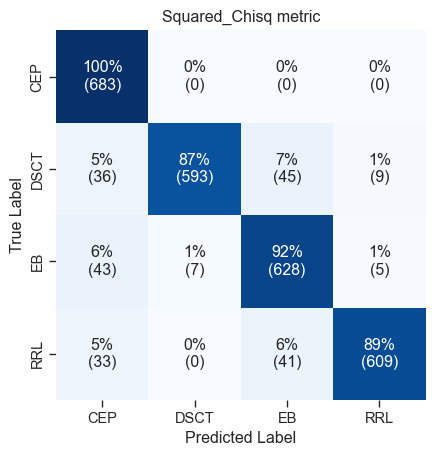

******************** Squaredchord ********************
F1 = 91.93 %
Accuracy = 91.91 %
Matthew's Coefficient = 89.39 %


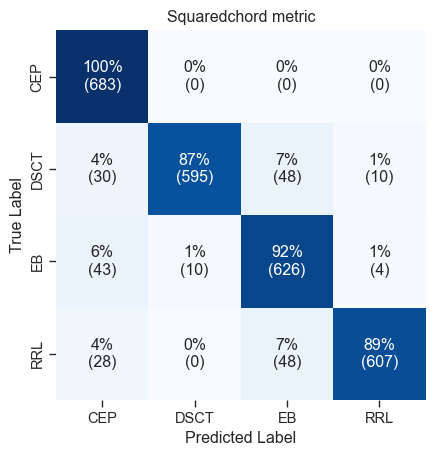

******************** Squared_Euclidean ********************
F1 = 90.13 %
Accuracy = 90.08 %
Matthew's Coefficient = 87.21 %


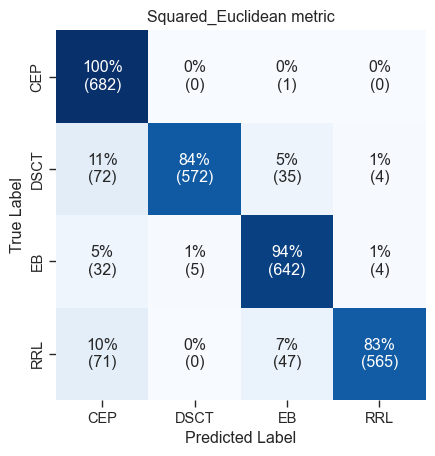

******************** Taneja ********************
F1 = 91.44 %
Accuracy = 91.43 %
Matthew's Coefficient = 88.74 %


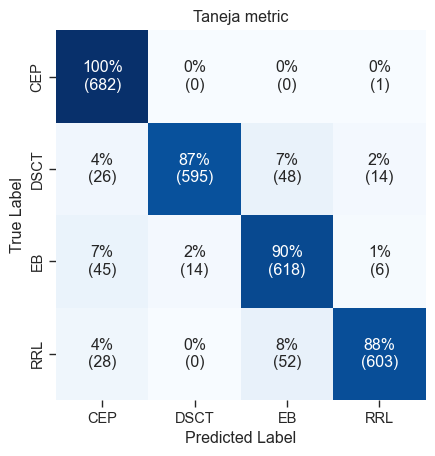

******************** Topsoe ********************
F1 = 91.86 %
Accuracy = 91.84 %
Matthew's Coefficient = 89.30 %


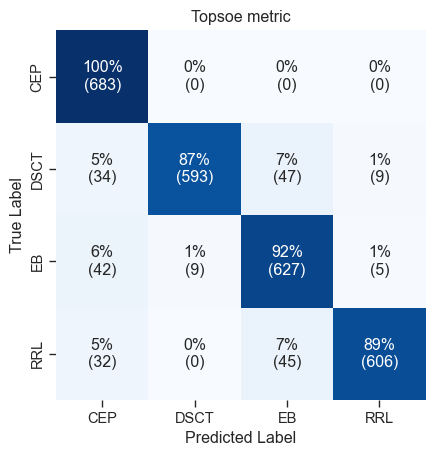

******************** Vicis_Symmetric_Chisq ********************
F1 = 79.69 %
Accuracy = 79.76 %
Matthew's Coefficient = 73.01 %


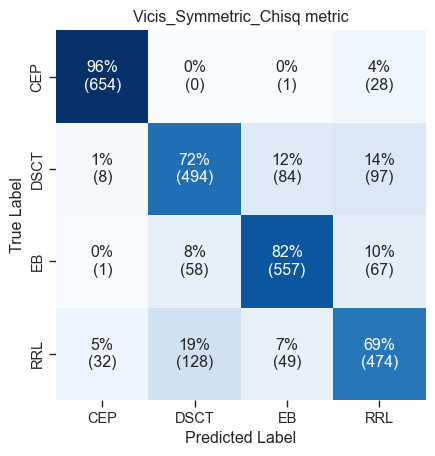

******************** Vicis_Wave_Hedges ********************
F1 = 84.10 %
Accuracy = 84.15 %
Matthew's Coefficient = 78.87 %


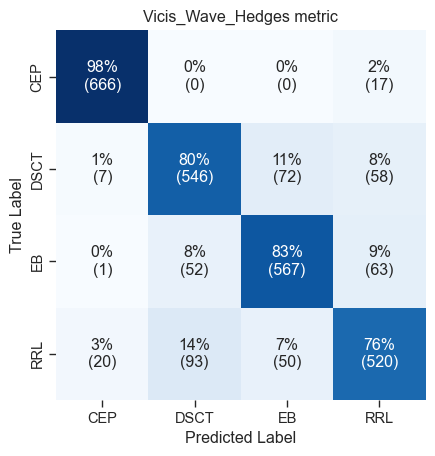

In [15]:
for metric in unique_metrics:
    metric_str = utils.get_metric_name(metric)
    print("*" * 20, metric_str, "*" * 20)
    
    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric,
        scale=True,
        central_stat="median",
        dispersion_stat="std",
    )
    y_pred = cross_val_predict(lcdc, X, y, cv=5, n_jobs=-1)

    acc = accuracy_score(y, y_pred)
    f1score = f1_score(y, y_pred, average="macro")
    matthew_coef = matthews_corrcoef(y, y_pred)
    print(
        f"F1 = {f1score*100:.2f} %\nAccuracy = {acc*100:.2f} %\nMatthew's Coefficient = {matthew_coef*100:.2f} %"
    )
    ax = utils.plot_cm(y_true=y, y_pred=y_pred)
    ax.set_title(f"{metric_str} metric")
    plt.show()

    dcpy_results.append([metric_str, f1score])
# dcpy_results = np.array(dcpy_results)
dcpy_results = pd.DataFrame(data=dcpy_results, columns=["metric","f1_score"])

In [16]:
metricchoose_threshold = 0.75
final_metrics = (dcpy_results[dcpy_results["f1_score"]>metricchoose_threshold]["metric"]).str.lower().to_numpy()

In [21]:
print("Length of final_metrics:", len(final_metrics))
final_metrics

Length of final_metrics: 29


array(['euclidean', 'braycurtis', 'canberra', 'cityblock', 'chebyshev',
       'clark', 'correlation', 'cosine', 'hellinger', 'jaccard',
       'lorentzian', 'meehl', 'soergel', 'wave_hedges', 'kulczynski',
       'add_chisq', 'acc', 'divergence', 'google', 'jeffreys',
       'kumarjohnson', 'penroseshape', 'squared_chisq', 'squaredchord',
       'squared_euclidean', 'taneja', 'topsoe', 'vicis_symmetric_chisq',
       'vicis_wave_hedges'], dtype=object)